# Introduction to Time Series Data

In this notebook we start our time series material. We will give a brief introduction to time series data. As a note, all of the theory presented in this section comes from the book <a href="https://otexts.com/fpp2/">Forecasting: Principles and Practice</a>, by Rob J Hyndman and George Athanasopoulos. We will barely scratch the surface of this field, and luckily that reference is available for free online. If you'd like to read more, just click on the book title. The code in the book is in `R` so you will have to search for python equivalents.

All of the data presented in this section of the course comes from the book's corresponding `R` library, `fpp2`.

You'll be working through this notebook in a breakout session to give you an opportunity to get used to working with time series data.

## What You Will Accomplish in This Notebook

In particular you will:
<ul>
    <li>Familiarize yourself with common time series data types in python,</li>
    <li>Plot some time series data,</li>
    <li>Learn about common patterns in time series data,</li>
    <li>How to split data for forecasting,</li>
    <li>Examine three simple forecasting models.</li>
</ul>

## What is Time Series Data?

A time series is any dataset where each observation corresponds to a specific time point.

Some common examples are:
<ul>
    <li>Stock ticker prices,</li>
    <li>Various climate measurements,</li>
    <li>Quarterly production ammounts,</li>
    <li>Points Scored by Michael Jordan each season of his career,</li>
    <li>And more!</li>
</ul>

If we want to work with time series data, we need to be familiar with how python handles time.

## Handling Time in Python

Python offers a number of time related data objects, the three we'll focus on are `datetimes`, `numpy` `datetime64s`, and `pandas` `Timestamps`.

### `datetimes`

These are built into base python, and are stored in the `datetime` package. Explore below.

In [1]:
# here we import the datetime class
from datetime import datetime

In [2]:
# let's create a datetime
test_1 = datetime(1992,7,27)

In [5]:
# see what you get when you run
# test_1.day, test_1.month, test_1.year
test_1.year



1992

In [8]:
# What about test_1.hour, test_1.minute, 
# test_1.second, test_1.microsecond
test_1.minute



0

In [10]:
# In general you can make a datetime like so
# datetime(year, month, day, hour, min, sec, micsec)




In [13]:
# You can find the current day, or exact time using
# datetime.today() and datetime.now()
datetime.now()




datetime.datetime(2020, 5, 11, 9, 35, 29, 976213)

You can learn more about `datetime` here, <a href="https://docs.python.org/3/library/datetime.html">https://docs.python.org/3/library/datetime.html</a>. If you work on a project with time series data you may need more than what we've introduced here.

### `numpy datetime64`

This object doesn't have all of the functionality that `datetime` and is still in the experimental phase per the official documentation <a href="https://numpy.org/doc/stable/reference/arrays.datetime.html?highlight=datetime">https://numpy.org/doc/stable/reference/arrays.datetime.html?highlight=datetime</a>.

But it may be desirable to use `numpy`, especially when handling large amounts of data. So let's introduce it here.

In [14]:
import numpy as np

In [15]:
# numpy datetime64s are created from strings
# again the standard is year-month-day
# followed by hour-minute-second
# note months must be in double digit format
test_2 = np.datetime64("1992-07-27 10:24:36")

In [16]:
test_2

numpy.datetime64('1992-07-27T10:24:36')

In [17]:
# You can't access day, month etc
# as with datetime objects, but
# you can restrict to the level of time that
# you want like so
np.array(test_2, dtype="datetime64[D]")

array('1992-07-27', dtype='datetime64[D]')

In [30]:
# try the getting the year using Y
# try getting the month using M
# try getting the hour using h
np.array(test_2, dtype="datetime64[Y]")



array('1992', dtype='datetime64[Y]')

In [31]:
# you can get an np array of dates at
# fixed intervals like so
np.arange(np.datetime64('2018-07-27'),
         np.datetime64('2020-07-28'),
         dtype="datetime64[M]")

array(['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
      dtype='datetime64[M]')

### `pandas Timestamp`

In [32]:
import pandas as pd

In [33]:
# you can make it work like np.datetime64
pd.Timestamp("1992-7-27")

Timestamp('1992-07-27 00:00:00')

In [34]:
# or like datetime
pd.Timestamp(1992,7,27)

Timestamp('1992-07-27 00:00:00')

In [35]:
# you can even make an array of datetimes
# using to_datetime
pd.to_datetime([str(year) + "-7-27" for year in range(1992,2020)])

DatetimeIndex(['1992-07-27', '1993-07-27', '1994-07-27', '1995-07-27',
               '1996-07-27', '1997-07-27', '1998-07-27', '1999-07-27',
               '2000-07-27', '2001-07-27', '2002-07-27', '2003-07-27',
               '2004-07-27', '2005-07-27', '2006-07-27', '2007-07-27',
               '2008-07-27', '2009-07-27', '2010-07-27', '2011-07-27',
               '2012-07-27', '2013-07-27', '2014-07-27', '2015-07-27',
               '2016-07-27', '2017-07-27', '2018-07-27', '2019-07-27'],
              dtype='datetime64[ns]', freq=None)

In [38]:
# make a pd timestamp of your birthday
pd.Timestamp(1993,12,15)



Timestamp('1993-12-15 00:00:00')

In [41]:
# make an array of timestamps of your birthday
# every year since you were born
pd.to_datetime([str(year) + "-12-15" for year in range(1993,2020)])




DatetimeIndex(['1993-12-15', '1994-12-15', '1995-12-15', '1996-12-15',
               '1997-12-15', '1998-12-15', '1999-12-15', '2000-12-15',
               '2001-12-15', '2002-12-15', '2003-12-15', '2004-12-15',
               '2005-12-15', '2006-12-15', '2007-12-15', '2008-12-15',
               '2009-12-15', '2010-12-15', '2011-12-15', '2012-12-15',
               '2013-12-15', '2014-12-15', '2015-12-15', '2016-12-15',
               '2017-12-15', '2018-12-15', '2019-12-15'],
              dtype='datetime64[ns]', freq=None)

## Plotting Time Series Data

A main tool in examining how well your time series forecasting model fits is by plotting the prediction along with the training data. 

To that end let's work through some examples of plotting time series data.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [43]:
measles = pd.read_csv("measles.csv")

# pandas reads the dates in as string by default
# we have to make them in the right format
measles['month'] = pd.to_datetime(measles['month'])

In [44]:
# this data collects the number of measles 
# cases in London each month from Jan 1928
# to June 1972
measles.head(10)

,month,cases
0,1928-01-01,609
1,1928-02-01,1516
2,1928-03-01,4952
3,1928-04-01,7466
4,1928-05-01,11155
5,1928-06-01,7002
6,1928-07-01,1315
7,1928-08-01,189
8,1928-09-01,74
9,1928-10-01,119


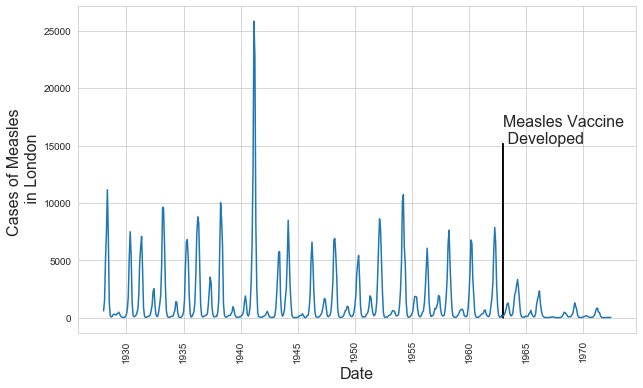

In [46]:
# matplotlib does a good job handling
# datetime data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(10,6))

plt.plot(measles.month, measles.cases)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Cases of Measles \n in London", fontsize=16)

case_1963 = measles.loc[measles.month == pd.Timestamp(1963,1,1),'cases'].values[0]
plt.text(pd.Timestamp(1963,1,1), case_1963+15000,
         "Measles Vaccine \n Developed", fontsize=16)

plt.arrow(pd.Timestamp(1963,1,1), case_1963+15000,
          0,-15000, width=50, shape='left', color="black")

plt.xticks(rotation=90)

plt.show()

In [52]:
# Now you try by plotting this data
ibm = pd.read_csv("ibm.csv")

In [50]:
# Notice we don't have dates, but the data is daily
# you can just use the index to count the days
# chronologically
ibm.head()

,closing_price
0,460
1,457
2,452
3,459
4,462


In [66]:
## plot here
ibm['days'] = pd.to_datetime(ibm.index,unit="D")
ibm['days']


0     1970-01-01
1     1970-01-02
2     1970-01-03
3     1970-01-04
4     1970-01-05
         ...    
364   1970-12-31
365   1971-01-01
366   1971-01-02
367   1971-01-03
368   1971-01-04
Name: days, Length: 369, dtype: datetime64[ns]

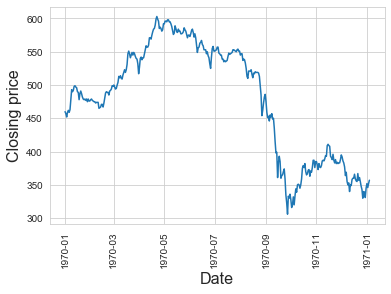

In [68]:
plt.plot(ibm.days, ibm.closing_price)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Closing price", fontsize=16)

# case_1963 = measles.loc[measles.month == pd.Timestamp(1963,1,1),'cases'].values[0]
# plt.text(pd.Timestamp(1963,1,1), case_1963+15000,
#          "Measles Vaccine \n Developed", fontsize=16)

# plt.arrow(pd.Timestamp(1963,1,1), case_1963+15000,
#           0,-15000, width=50, shape='left', color="black")

plt.xticks(rotation=90)

plt.show()

### Common Time Series  Patterns

Plotting time series allows us to see some of the common patterns in time series data.
<ol>
    <li>Trends - where the data exhibits a general increase or decrease over time, and </li>
    <li>Seasonality - where fluctuations in the data occur occur at fixed frequencies, for example how seasonal influenza cases tend to spread from October to May each year.</li>
</ol>

Let's see these in action with two more data sets.

In [69]:
# plot the following Boston marathon times
# from 1897 to 2016 to see an example of
# time series data with a trend
marathon = pd.read_csv("marathon.csv")

marathon.head()

,year,time
0,1897,175.166667
1,1898,162.000000
2,1899,174.633333
3,1900,159.733333
4,1901,149.383333


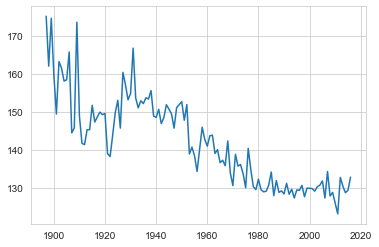

In [74]:
## plot here
# marathon["year"] = pd.to_datetime(marathon["year"],unit="Y")


plt.plot(marathon["year"], marathon["time"])



What kind of trend did you see?





In [75]:
# Plot this subset of the measles data
# from 1955 to 1964
measles_subset = measles.loc[(measles.month > datetime(1954,12,1)) & (measles.month < datetime(1964,1,1)),]

measles_subset.head()

,month,cases
324,1955-01-01,364
325,1955-02-01,603
326,1955-03-01,1305
327,1955-04-01,1853
328,1955-05-01,1865


/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


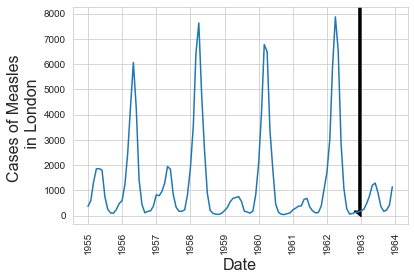

In [77]:
# plot here
measles_subset['month'] = pd.to_datetime(measles_subset['month'])
plt.plot(measles_subset.month, measles_subset.cases)

plt.xlabel("Date", fontsize=16)
plt.ylabel("Cases of Measles \n in London", fontsize=16)

plt.arrow(pd.Timestamp(1963,1,1), case_1963+15000,
          0,-15000, width=50, shape='left', color="black")

plt.xticks(rotation=90)

plt.show()




Did you notice any seasonsality? Explain what you saw.




In [78]:
# read in this data on the 
# day to day differences in
# Google's closing stock price over 1000
# consecutive trading days
goog_diff = pd.read_csv("goog_diff.csv")

goog_diff.head()

,day_to_day_diff
0,-0.317932
1,4.793823
2,0.705414
3,2.478882
4,7.605530


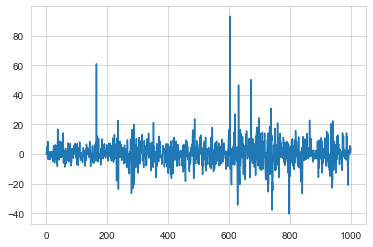

In [79]:
# Plot here
plt.plot(goog_diff.index,goog_diff.day_to_day_diff)




Could you identify any sort of trend or seasonality?


## Forecasting

As with the regression data, our goal is ultimately to make predictions about data where we don't already know the outcome. With time series data this means we want to make models that will predict on future data, known as <i>forecasting</i>.

### Updating Train-Test Splits

Training a model to forecast is slightly different than our regression tasks. When we conduct our train-test split we can't just take any random collection of data points because these data come with a natural order, their times. 

So it is common to hold out testing data using the most recent observations. A common standard is $20\%$, but the percentage depends on how far out you want to predict, known as the forecast's maximum <i>horizon</i>.

In [80]:
# Make a train test split for the marathon data.
# hold out 10% of the data for testing
# call the train data marathon_train
# call the test data marathon_test

measles_copy = marathon.copy()

marathon_train = marathon_copy.sample(frac=.9,random_state = 614)
marathon_test = marathon_copy.drop(marathon_train.index)




In [ ]:
# Additional Code here if needed






In [ ]:
# Now break the measles data into two subsets
# pre 1963 and post 1963





In [ ]:
# using the pre 1963 data
# make a train test split holding out all data
# after 1959 for the test set
# call the train data measles_train
# call the test data measles_test





In [ ]:
# additional coding here if needed







### Three Simple Forecasting Methods

We'll end by showing three simple forecasting methods. You'll use these to predict marathon times and measles cases.

#### The Average Method

Here you take all future observations to be the historical (training) data's average. The forecast can be written as:
$$
E(y_{T+h}|T) = \hat{y}_{T+h|T}= \frac{1}{T}\sum_{t=1}^T y_t,
$$
where here $T$ is the number of observations in your data set, and were using $T+h|T$ to indicate the value at time $T+h$ given all of the values from time $1$ to $T$. $h$ denotes the <i>horizon</i> of the forecast, i.e. how far out you want to predict.

#### The Na\&iuml;ve Method

Take all future observations to be the last observation in the training set. The forecast can be written as:
$$
\hat{y}_{T+h|T} = y_T.
$$

Note that in the last two methods our prediction is the same no matter how far out you want to predict.

In [82]:
## Average Method
# plot predictions using the average method for the 
# marathon data against the test data
marathon = pd.read_csv("marathon.csv", parse_dates = ['year'])
marathon_train = marathon.copy()[:-5]
marathon_test.head()





,year,time
5,1902,163.200000
10,1907,144.400000
13,1910,148.866667
15,1912,141.300000
27,1924,149.666667


In [ ]:
# additional code here if needed







In [ ]:
# here too






In [ ]:
## Naive Method
# plot predictions using the naive method for the 
# marathon data against the test data








In [ ]:
# additional code here if needed







In [ ]:
# here too






#### The Seasonal Na\&iuml;ve Method

You can adapt the na\&iuml;ve method for clearly seasonal data.

Here instead of taking the observation from the end of the dataset, you use the observation from the corresponding point in the past "season". Assume the season lasts $m$ time units, then the forecast formula is:
$$
\hat{y}_{T+h|T} = y_{T + (h\mod m)-m}.
$$

We can use this on the measles data.

In [83]:
measles_train = measles.loc[measles.month < datetime(1959,1,1),].copy()
measles_test = measles.loc[(measles.month >= datetime(1959,1,1)) & (measles.month < datetime(1963,1,1))].copy()

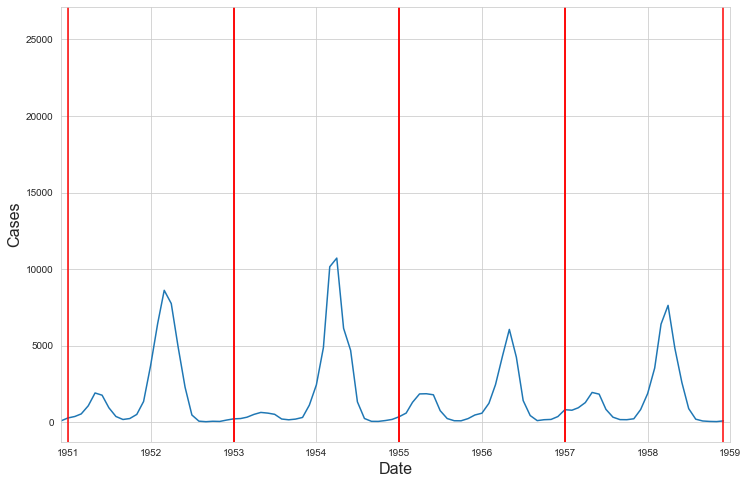

In [84]:
plt.figure(figsize=(12,8))

plt.plot(measles_train.month,measles_train.cases)

plt.axvline(x=datetime(1957,1,1), ymin=0, ymax=2500, color='r')
plt.axvline(x=datetime(1958,12,1), ymin=0, ymax=2500, color='r')

plt.axvline(x=datetime(1955,1,1), ymin=0, ymax=2500, color='r')
plt.axvline(x=datetime(1957,1,1), ymin=0, ymax=2500, color='r')


plt.axvline(x=datetime(1953,1,1), ymin=0, ymax=2500, color='r')
plt.axvline(x=datetime(1955,1,1), ymin=0, ymax=2500, color='r')


plt.axvline(x=datetime(1951,1,1), ymin=0, ymax=2500, color='r')
plt.axvline(x=datetime(1953,1,1), ymin=0, ymax=2500, color='r')

plt.xlim(datetime(1950,12,1),datetime(1959,1,1))

plt.xlabel("Date", fontsize=16)
plt.ylabel("Cases", fontsize=16)

plt.show()

It appears that the season is roughly two years long.

So using the seasonal na\&iuml;ve method for month $i$ we would use the observation for month $i$ from 2 years prior. For example, for January 1959 we'd use the cases from January 1957.

We can get this in the dataframe using the index for when we'd like to predict and subtracting $24$ from it.

Let's implement this below.

In [85]:
# Make a df to hold all the predictions we want
measles_pred = measles.loc[measles.month < datetime(1963,1,1),].copy()

# we want to predict on all months
# starting in 1959
measles_pred.loc[measles.month >= datetime(1959,1,1),'cases'] = -99

# for each month we want to predict
for date in  measles_test.month.values:
    # get the index from two years prior
    prediction_index = measles_pred.loc[measles.month == date,].index[0] - 24
    # get the # of cases from that index
    prediction = measles_pred.cases[prediction_index]
    # make the prediction
    measles_pred.loc[measles.month == date,'cases'] = prediction
    
# get rid of the training data to make plotting easier
measles_pred = measles_pred.loc[measles_pred.month >= datetime(1959,1,1),]

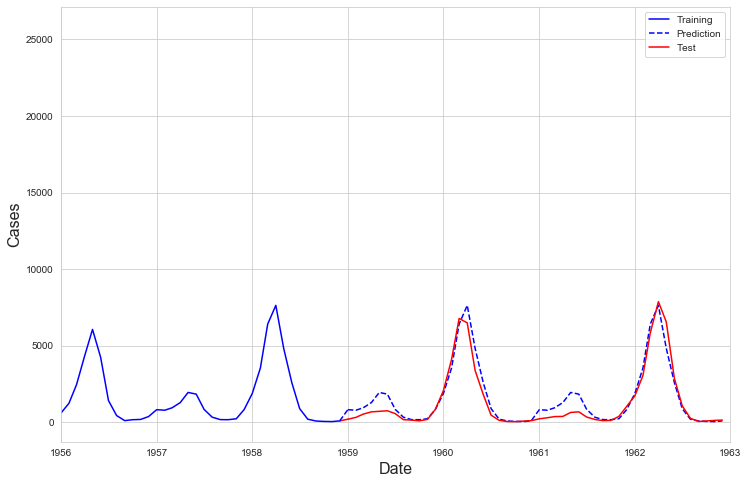

In [86]:
# plot the predictions
plt.figure(figsize = (12,8))

plt.plot(measles_train.month,measles_train.cases,'b',label="Training")
plt.plot(measles_pred.month,measles_pred.cases,'b--',label="Prediction")
plt.plot(measles_test.month,measles_test.cases,'r',label="Test")

plt.plot([measles_train.month.values[-1],measles_test.month.values[0]],
        [measles_train.cases.values[-1],measles_test.cases.values[0]],
        'r')

plt.plot([measles_train.month.values[-1],measles_pred.month.values[0]],
        [measles_train.cases.values[-1],measles_pred.cases.values[0]],
        'b--')

plt.xlabel("Date", fontsize=16)
plt.ylabel("Cases", fontsize=16)

plt.xlim((datetime(1956,1,1),datetime(1963,1,1)))

plt.legend()

plt.show()

In [ ]:
# Use the seasonal naive method to project what 
# could have happened if the measles
# vaccine was not developed in 1963
# plot it versus what actually happened






In [ ]:
# additional code here if needed







In [ ]:
# here too






Again note that the prediction is somewhat independent of the maximum horizon. If we go beyond one season out we end up repeating the most previous season over and over again.


That's it for this notebook!

Next lag and autocorrelation in time series.

### References

Chapters 2 and 3 of <a href="https://otexts.com/fpp2/">Forecasting: Principles and Practice</a>, by Rob J Hyndman and George Athanasopoulos.

`datetime` <a href="https://docs.python.org/3/library/datetime.html">documentation</a>

This blog post on `np.datetime64` <a href="https://blog.finxter.com/how-to-work-with-dates-and-times-in-python/">https://blog.finxter.com/how-to-work-with-dates-and-times-in-python/</a>

`pandas` documentation <a href="https://pandas.pydata.org/">https://pandas.pydata.org/</a>